In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Load the dataset 
data = pd.read_csv('diabeticdataset.csv')

In [3]:
#EDA
##print shape of the dataset with rows and columns
print(data.shape)  

(390, 16)


In [4]:
##print dataset with rows and columns
print(data)

     Patient number  Cholesterol  Glucose  HDL Chol  Chol/HDL ratio  Age   
0                 1          193       77        49             3.9   19  \
1                 2          146       79        41             3.6   19   
2                 3          217       75        54             4.0   20   
3                 4          226       97        70             3.2   20   
4                 5          164       91        67             2.4   20   
..              ...          ...      ...       ...             ...  ...   
385             386          227      105        44             5.2   83   
386             387          226      279        52             4.3   84   
387             388          301       90       118             2.6   89   
388             389          232      184       114             2.0   91   
389             390          165       94        69             2.4   92   

     Gender  Height  Weight   BMI  Systolic BP  Diastolic BP  waist  hip   
0    female

In [5]:
#PRINT All Columns of dataset
print(data.columns)

Index(['Patient number', 'Cholesterol', 'Glucose', 'HDL Chol',
       'Chol/HDL ratio', 'Age', 'Gender', 'Height', 'Weight', 'BMI',
       'Systolic BP', 'Diastolic BP', 'waist', 'hip', 'Waist/hip ratio',
       'Diabetes'],
      dtype='object')


In [6]:
#PRINT TOP 5 records
print(data.head())

   Patient number  Cholesterol  Glucose  HDL Chol  Chol/HDL ratio  Age   
0               1          193       77        49             3.9   19  \
1               2          146       79        41             3.6   19   
2               3          217       75        54             4.0   20   
3               4          226       97        70             3.2   20   
4               5          164       91        67             2.4   20   

   Gender  Height  Weight   BMI  Systolic BP  Diastolic BP  waist  hip   
0  female      61     119  22.5          118            70     32   38  \
1  female      60     135  26.4          108            58     33   40   
2  female      67     187  29.3          110            72     40   45   
3  female      64     114  19.6          122            64     31   39   
4  female      70     141  20.2          122            86     32   39   

   Waist/hip ratio     Diabetes  
0             0.84  No diabetes  
1             0.83  No diabetes  
2       

In [7]:
#PRINT LAST 5 records
print(data.tail())

     Patient number  Cholesterol  Glucose  HDL Chol  Chol/HDL ratio  Age   
385             386          227      105        44             5.2   83  \
386             387          226      279        52             4.3   84   
387             388          301       90       118             2.6   89   
388             389          232      184       114             2.0   91   
389             390          165       94        69             2.4   92   

     Gender  Height  Weight   BMI  Systolic BP  Diastolic BP  waist  hip   
385  female      59     125  25.2          150            90     35   40  \
386  female      60     192  37.5          144            88     41   48   
387  female      61     115  21.7          218            90     31   41   
388  female      61     127  24.0          170            82     35   38   
389  female      62     217  39.7          160            82     51   51   

     Waist/hip ratio     Diabetes  
385             0.88  No diabetes  
386           

In [8]:
#summary statistics for each numerical column in the dataset
print(data.describe())

       Patient number  Cholesterol     Glucose    HDL Chol  Chol/HDL ratio   
count      390.000000   390.000000  390.000000  390.000000      390.000000  \
mean       195.500000   207.230769  107.338462   50.266667        4.524615   
std        112.727548    44.666005   53.798188   17.279069        1.736634   
min          1.000000    78.000000   48.000000   12.000000        1.500000   
25%         98.250000   179.000000   81.000000   38.000000        3.200000   
50%        195.500000   203.000000   90.000000   46.000000        4.200000   
75%        292.750000   229.000000  107.750000   59.000000        5.400000   
max        390.000000   443.000000  385.000000  120.000000       19.300000   

              Age      Height      Weight         BMI  Systolic BP   
count  390.000000  390.000000  390.000000  390.000000   390.000000  \
mean    46.774359   65.951282  177.407692   28.775641   137.133333   
std     16.435911    3.918867   40.407824    6.600915    22.859528   
min     19.000000

In [9]:
#check for missing or null values in the dataset
print(data.isnull())

     Patient number  Cholesterol  Glucose  HDL Chol  Chol/HDL ratio    Age   
0             False        False    False     False           False  False  \
1             False        False    False     False           False  False   
2             False        False    False     False           False  False   
3             False        False    False     False           False  False   
4             False        False    False     False           False  False   
..              ...          ...      ...       ...             ...    ...   
385           False        False    False     False           False  False   
386           False        False    False     False           False  False   
387           False        False    False     False           False  False   
388           False        False    False     False           False  False   
389           False        False    False     False           False  False   

     Gender  Height  Weight    BMI  Systolic BP  Diastolic BP  

In [10]:
#checks for missing or null values column-wise
print(data.isnull().any())

Patient number     False
Cholesterol        False
Glucose            False
HDL Chol           False
Chol/HDL ratio     False
Age                False
Gender             False
Height             False
Weight             False
BMI                False
Systolic BP        False
Diastolic BP       False
waist              False
hip                False
Waist/hip ratio    False
Diabetes           False
dtype: bool


In [11]:
#provides a concise summary of the DataFrame's structure and content
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Patient number   390 non-null    int64  
 1   Cholesterol      390 non-null    int64  
 2   Glucose          390 non-null    int64  
 3   HDL Chol         390 non-null    int64  
 4   Chol/HDL ratio   390 non-null    float64
 5   Age              390 non-null    int64  
 6   Gender           390 non-null    object 
 7   Height           390 non-null    int64  
 8   Weight           390 non-null    int64  
 9   BMI              390 non-null    float64
 10  Systolic BP      390 non-null    int64  
 11  Diastolic BP     390 non-null    int64  
 12  waist            390 non-null    int64  
 13  hip              390 non-null    int64  
 14  Waist/hip ratio  390 non-null    float64
 15  Diabetes         390 non-null    object 
dtypes: float64(3), int64(11), object(2)
memory usage: 48.9+ KB
Non

In [12]:
#rearrange the rows in the DataFrame based on the values in the 'Age' column
print(data.sort_values(by='Age'))

     Patient number  Cholesterol  Glucose  HDL Chol  Chol/HDL ratio  Age   
0                 1          193       77        49             3.9   19  \
1                 2          146       79        41             3.6   19   
11               12          193      106        63             3.1   20   
10               11          174      105       117             1.5   20   
8                 9          230      112        64             3.6   20   
..              ...          ...      ...       ...             ...  ...   
385             386          227      105        44             5.2   83   
386             387          226      279        52             4.3   84   
387             388          301       90       118             2.6   89   
388             389          232      184       114             2.0   91   
389             390          165       94        69             2.4   92   

     Gender  Height  Weight   BMI  Systolic BP  Diastolic BP  waist  hip   
0    female

In [13]:
#command sorts a DataFrame called data by the 'Age' column in descending order (from highest to lowest age values). 
# This will rearrange the rows in the DataFrame based on the values in the 'Age' column while keeping the data within each row intact.
print(data.sort_values(by='Age', ascending=False))

     Patient number  Cholesterol  Glucose  HDL Chol  Chol/HDL ratio  Age   
389             390          165       94        69             2.4   92  \
388             389          232      184       114             2.0   91   
387             388          301       90       118             2.6   89   
386             387          226      279        52             4.3   84   
385             386          227      105        44             5.2   83   
..              ...          ...      ...       ...             ...  ...   
5                 6          170       69        64             2.7   20   
4                 5          164       91        67             2.4   20   
3                 4          226       97        70             3.2   20   
1                 2          146       79        41             3.6   19   
0                 1          193       77        49             3.9   19   

     Gender  Height  Weight   BMI  Systolic BP  Diastolic BP  waist  hip   
389  female

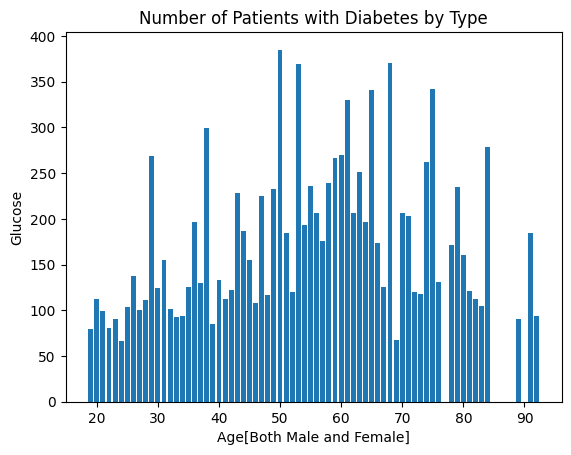

In [14]:
# Data show the Glucose Level by Age [Both Male and Female]

# Create a bar plot
plt.bar(data['Age'], data['Glucose'])

# Add labels and title
plt.xlabel('Age[Both Male and Female]')
plt.ylabel('Glucose')
plt.title('Number of Patients with Diabetes by Type')

# Show the plot
plt.show()

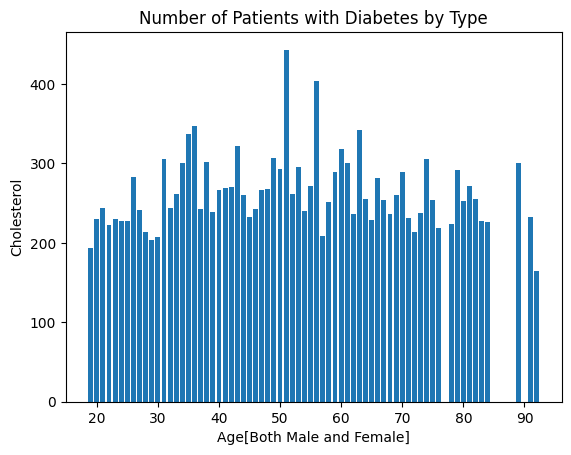

In [15]:
# Data show the Glucose Level by Age [Both Male and Female]

# Create a bar plot
plt.bar(data['Age'], data['Cholesterol'])

# Add labels and title
plt.xlabel('Age[Both Male and Female]')
plt.ylabel('Cholesterol')
plt.title('Number of Patients with Diabetes by Type')

# Show the plot
plt.show()

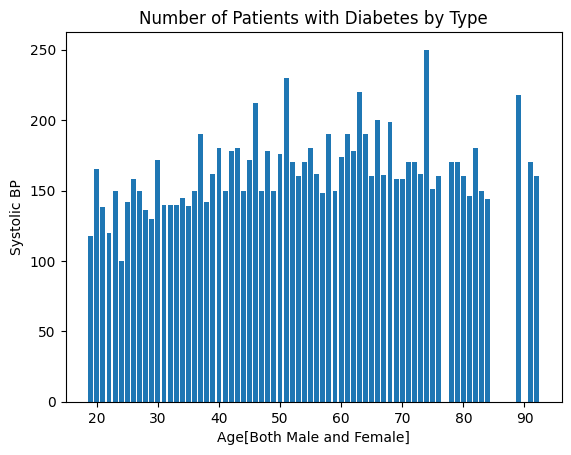

In [16]:
# Data show the Glucose Level by Age [Both Male and Female]

# Create a bar plot
plt.bar(data['Age'], data['Systolic BP'])

# Add labels and title
plt.xlabel('Age[Both Male and Female]')
plt.ylabel('Systolic BP')
plt.title('Number of Patients with Diabetes by Type')

# Show the plot
plt.show()

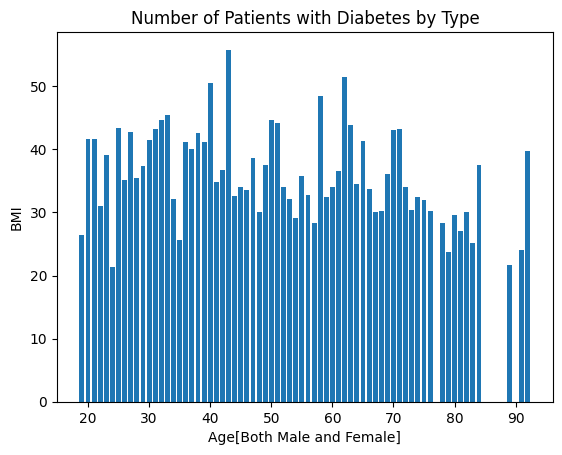

In [17]:
#BMI
# Data show the Glucose Level by Age [Both Male and Female]

# Create a bar plot
plt.bar(data['Age'], data['BMI'])

# Add labels and title
plt.xlabel('Age[Both Male and Female]')
plt.ylabel('BMI')
plt.title('Number of Patients with Diabetes by Type')

# Show the plot
plt.show()

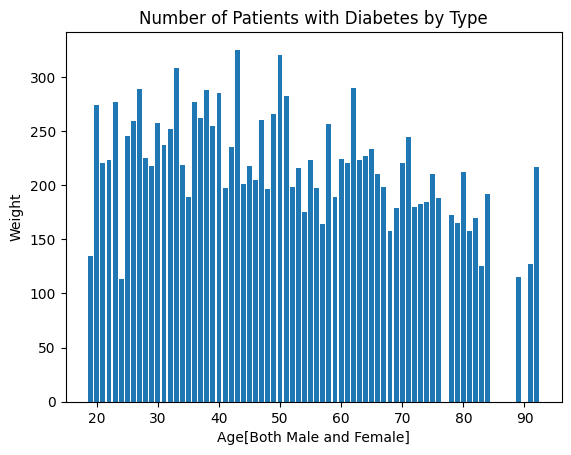

In [18]:
#Weight
# Data show the Glucose Level by Age [Both Male and Female]

# Create a bar plot
plt.bar(data['Age'], data['Weight'])

# Add labels and title
plt.xlabel('Age[Both Male and Female]')
plt.ylabel('Weight')
plt.title('Number of Patients with Diabetes by Type')

# Show the plot
plt.show()

In [34]:
# Encode the 'Gender' column to numerical values
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Diabetes'] = le.fit_transform(data['Diabetes'])

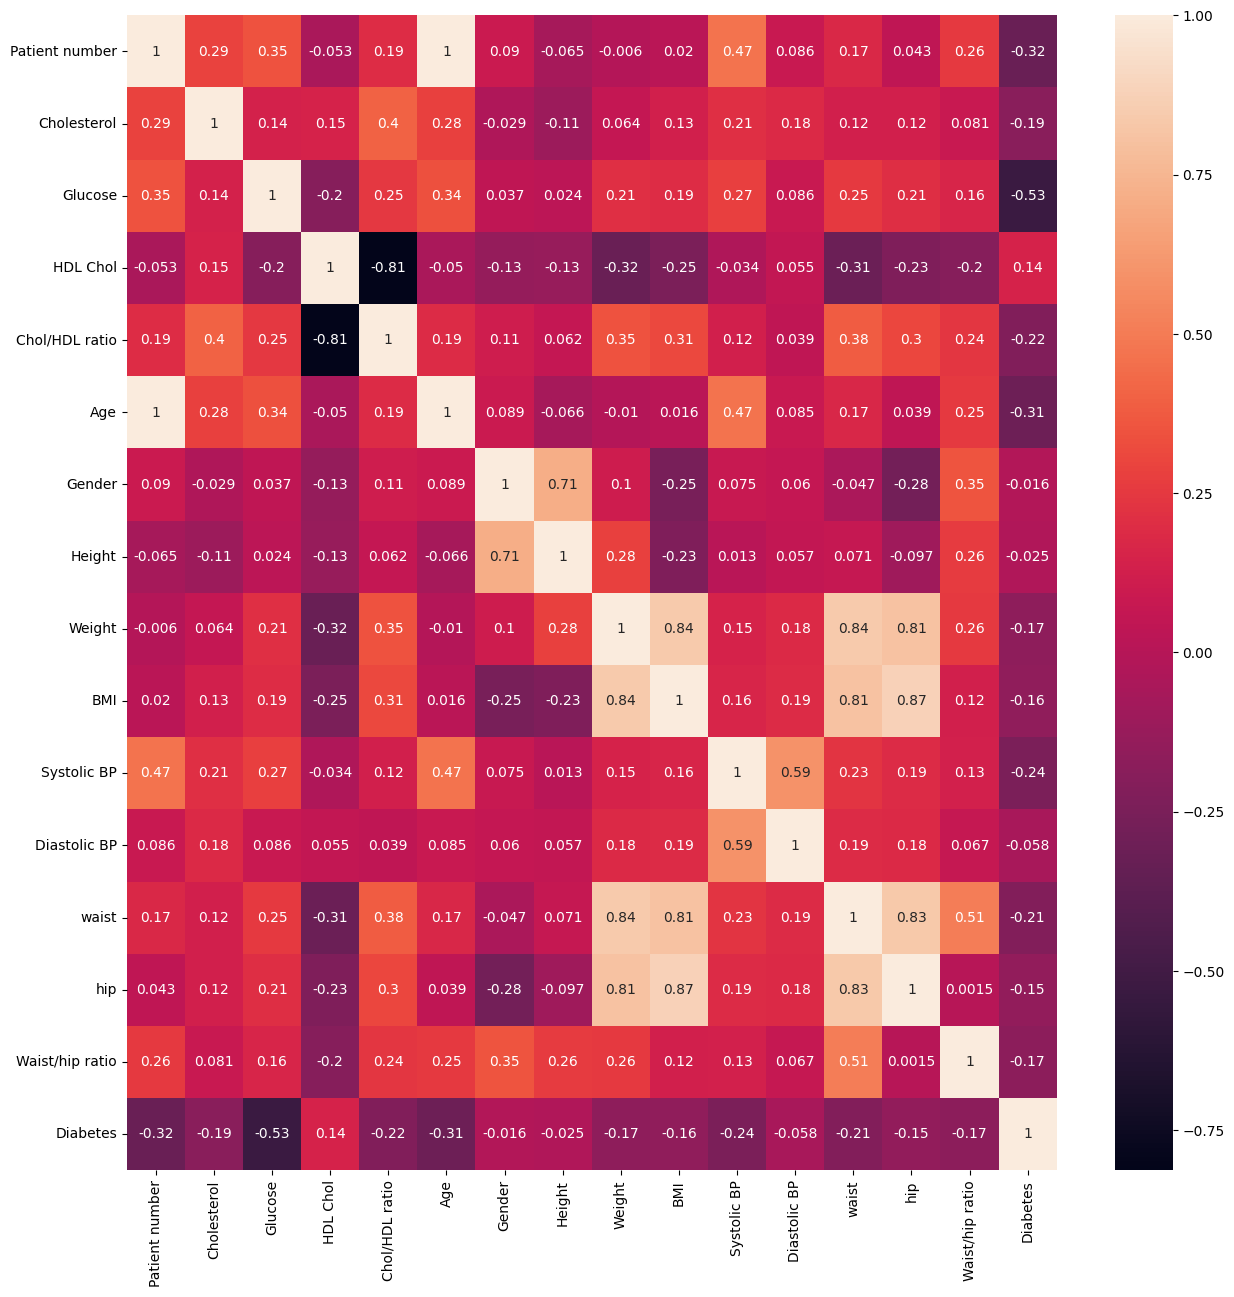

In [38]:
teju = data.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(teju,annot=True)

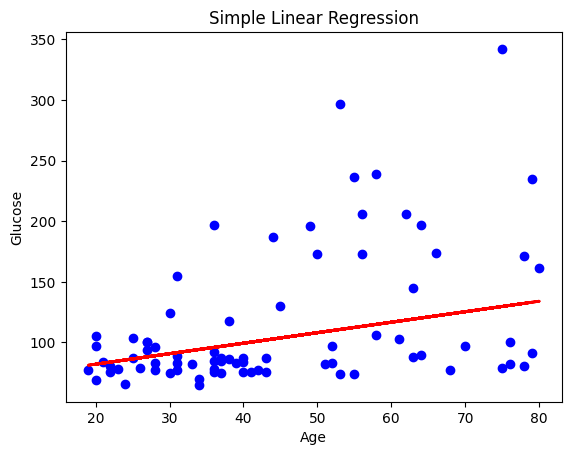

Mean Absolute Error: 35.38492617555252
Mean Squared Error: 2783.15599704197
Root Mean Squared Error: 52.75562526443952
Predicted Glucose for 60 Age: 116.70414763960267
Slope (Age): 0.8648695153151343
Intercept: 64.81197672069462
Predicted Glucose for Age=80: 134.00153794590537


In [45]:
# Select the independent variable (Cholesterol) and dependent variable (Glucose)
X = data['Age'].values.reshape(-1, 1)
y = data['Glucose'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Get the slope (coefficient) and intercept from the trained model
slope = model.coef_[0]
intercept = model.intercept_

# Define a function to calculate the predicted values
def linear_regression_line(x):
    return slope * x + intercept

# Example usage:
newage = 80  # the Cholesterol value for which we want to predict Glucose
predicted_glucose2 = linear_regression_line(newage)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Visualize the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Simple Linear Regression')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.show()

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("===================================================================")
# Predict Glucose for a new Cholesterol value
age = np.array([[60]])  
predicted_glucose = model.predict(age)
print('Predicted Glucose for 60 Age:', predicted_glucose[0])
print("===================================================================")
# Print the slope and intercept
print(f"Slope (Age): {slope}")
print(f"Intercept: {intercept}")
print(f"Predicted Glucose for Age={newage}: {predicted_glucose2}")
